<a href="https://colab.research.google.com/github/saurabh1825/Wine-/blob/main/Wine_Quality_Test_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics  import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


In [10]:
wine = pd.read_csv("winequality-red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<ipython-input-11-4c32b06082c4>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  wine.hist(ax = ax)


array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

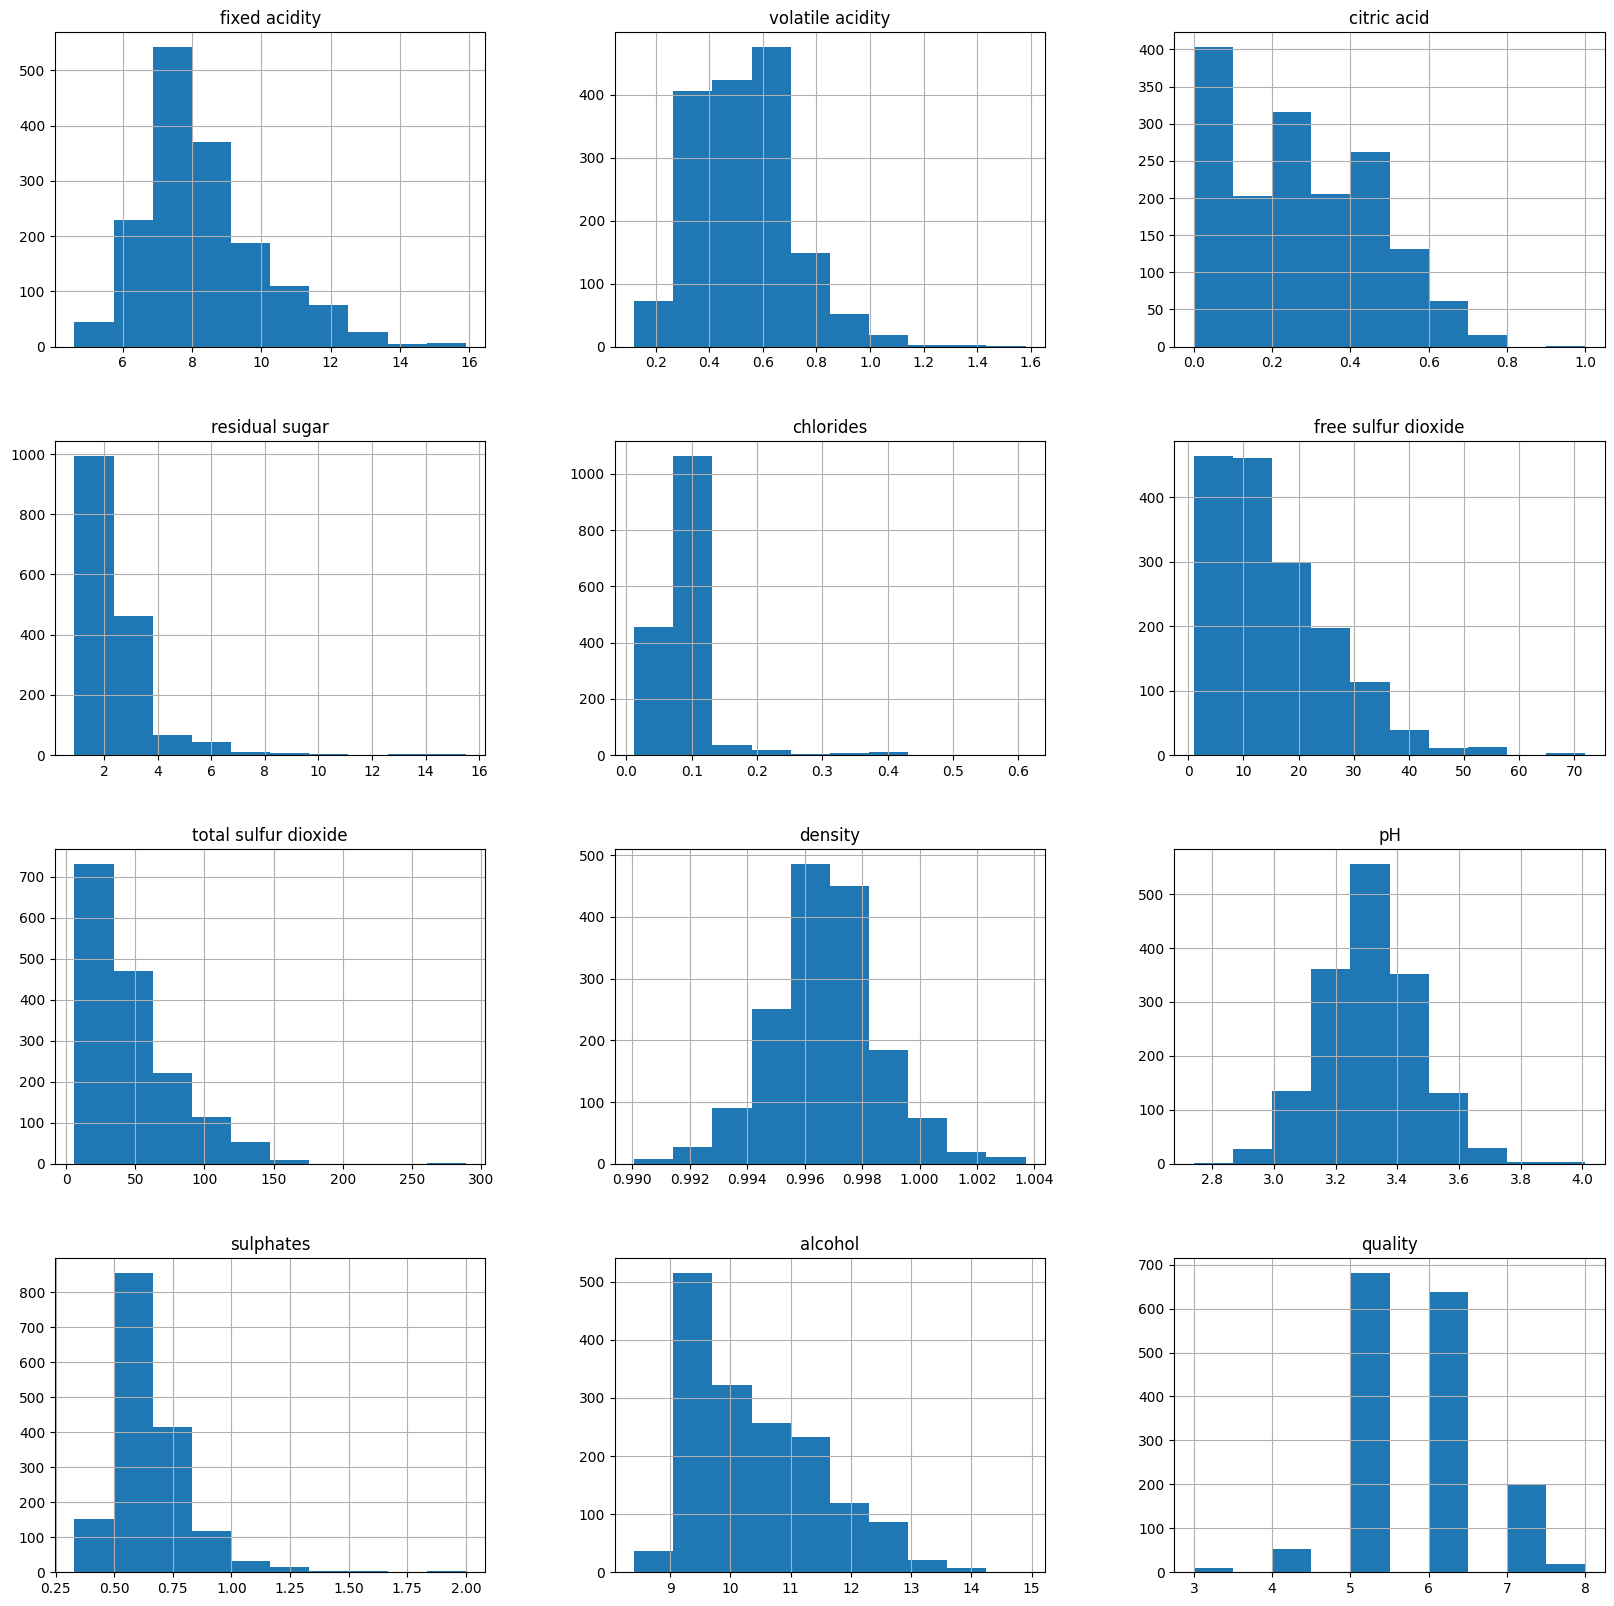

In [11]:
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
wine.hist(ax = ax)

In [12]:
wine.shape

(1599, 12)

In [13]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [15]:
wine.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.000000,8.319637,1.741096,4.600000,7.100000,7.900000,9.200000,15.900000
volatile acidity,1599.000000,0.527821,0.179060,0.120000,0.390000,0.520000,0.640000,1.580000
citric acid,1599.000000,0.270976,0.194801,0.000000,0.090000,0.260000,0.420000,1.000000
residual sugar,1599.000000,2.538806,1.409928,0.900000,1.900000,2.200000,2.600000,15.500000
chlorides,1599.000000,0.087467,0.047065,0.012000,0.070000,0.079000,0.090000,0.611000
free sulfur dioxide,1599.000000,15.874922,10.460157,1.000000,7.000000,14.000000,21.000000,72.000000
total sulfur dioxide,1599.000000,46.467792,32.895324,6.000000,22.000000,38.000000,62.000000,289.000000
density,1599.000000,0.996747,0.001887,0.990070,0.995600,0.996750,0.997835,1.003690
pH,1599.000000,3.311113,0.154386,2.740000,3.210000,3.310000,3.400000,4.010000
sulphates,1599.000000,0.658149,0.169507,0.330000,0.550000,0.620000,0.730000,2.000000


In [ ]:
sns.pairplot(wine)

In [ ]:
sns.catplot(x='quality', data = wine, kind = 'count', palette= 'Spectral')

In [ ]:
plot = plt.figure(figsize=(9,6))
sns.barplot(x = 'quality', y = 'volatile acidity' ,data = wine, palette= 'ocean')

In [ ]:
plot = plt.figure(figsize=(9,6))
sns.barplot(x = 'quality', y = 'citric acid' ,data = wine, palette= 'ocean')

In [ ]:
wine.plot(kind='scatter', x='volatile acidity', y='citric acid')

In [ ]:
plt.figure(figsize=(20,9))
sns.boxplot(data = wine)

In [ ]:
plt.title('Outliers in free sulfur dioxide column')

sns.boxplot( y = 'free sulfur dioxide', data = wine)

In [ ]:
plt.title('Outliers in total sulfur dioxide column')

sns.boxplot( y = 'total sulfur dioxide', data = wine)

In [ ]:
correlation = wine.corr()

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot =True,cmap ="Blues", square = True, cbar = True, fmt='.2f')

In [ ]:
X = wine.drop('quality',axis = 1).values

In [ ]:
y = wine['quality'].apply(lambda y_values: 1 if y_values>=7 else 0 )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.20,random_state=2)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

In [ ]:
model = RandomForestClassifier()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
X_test_predict = model.predict(X_test)
test_accuracy = accuracy_score(X_test_predict, y_test)

In [ ]:
print('Accuracy : ', test_accuracy)